# Data Exploration Notebook

### Importing Necessary Libraries

In [8]:
# File Handling and Manipulation
import os
import shutil
from PIL import Image

# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# GeoSpatial Data Processing
import rasterio
from rasterio.enums import Resampling
from rasterio.plot import show

# Utilities
import random
from tqdm import tqdm
import textwrap
import ast
from glob import glob


### Setting Of Paths

In [64]:
metadata_df_05percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\0.5%_BigEarthNet\metadata_0.5_percent.csv')
metadata_df_1percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\1%_BigEarthNet\metadata_1_percent.csv')
metadata_df_5percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\metadata_5_percent.csv')
metadata_df_10percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\10%_BigEarthNet\metadata_10_percent.csv')
metadata_df_50percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\50%_BigEarthNet\metadata_50_percent.csv')
metadata_df_original = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\100%_BigEarthNet\metadata_100_percent.csv')

dataset_dir = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\1%Copy'
original_dataset_dir = r'D:\Datasets\100%BigEarthNet'

### Process Metadata: Clean Labels and Summarize Image Counts per Subset

In [10]:
# Function to clean and parse labels
def clean_and_parse_labels(label_string):
    cleaned_labels = label_string.replace(" '", ", '").replace("[", "[").replace("]", "]")
    return ast.literal_eval(cleaned_labels)

# List of metadata file paths
metadata_files = {
    '0.5%': r'C:\Users\isaac\Desktop\BigEarthTests\0.5%_BigEarthNet\metadata_0.5_percent.csv',
    '1%': r'C:\Users\isaac\Desktop\BigEarthTests\1%_BigEarthNet\metadata_1_percent.csv',
    '5%': r'C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\metadata_5_percent.csv',
    '10%': r'C:\Users\isaac\Desktop\BigEarthTests\10%_BigEarthNet\metadata_10_percent.csv',
    '50%': r'C:\Users\isaac\Desktop\BigEarthTests\50%_BigEarthNet\metadata_50_percent.csv',
    '100%': r'C:\Users\isaac\Desktop\BigEarthTests\100%_BigEarthNet\metadata_100_percent.csv'
}

final_dfs = {}

# Process each metadata file
for subset, file_path in metadata_files.items():
    metadata_df = pd.read_csv(file_path)
    metadata_df['labels'] = metadata_df['labels'].apply(clean_and_parse_labels) # Clean and parse the labels
    
    total_images = metadata_df.shape[0] # Count the total number of images
    label_counts = metadata_df['labels'].explode().value_counts().sort_index() # Count the number of images for each category
    
    # Convert the label counts to a DataFrame
    label_df = label_counts.reset_index()
    label_df.columns = ['Label', 'Number of Images']
    
    # Add the total images count to the DataFrame
    total_df = pd.DataFrame({'Label': ['Total Images'], 'Number of Images': [total_images]})
    final_df = pd.concat([total_df, label_df], ignore_index=True)
    
    # Sort the DataFrame by Number of Images in ascending order
    final_df = final_df.sort_values(by='Number of Images', ascending=True)
    
    # Store the final DataFrame in the dictionary
    final_dfs[subset] = final_df
    
    # Display the table
    print(f"Subset: {subset}")
    display(final_df)
    print("\n")

Subset: 0.5%


,Label,Number of Images
3,"Beaches, dunes, sands",7
5,Coastal wetlands,7
8,Industrial or commercial units,49
15,Natural grassland and sparsely vegetated areas,52
14,"Moors, heathland and sclerophyllous vegetation",71
10,Inland wetlands,109
17,Permanent crops,145
1,Agro-forestry areas,176
9,Inland waters,291
12,Marine waters,310




Subset: 1%


,Label,Number of Images
3,"Beaches, dunes, sands",6
5,Coastal wetlands,15
15,Natural grassland and sparsely vegetated areas,112
8,Industrial or commercial units,138
14,"Moors, heathland and sclerophyllous vegetation",147
10,Inland wetlands,179
17,Permanent crops,271
1,Agro-forestry areas,336
12,Marine waters,628
19,Urban fabric,644




Subset: 5%


,Label,Number of Images
5,Coastal wetlands,62
3,"Beaches, dunes, sands",65
8,Industrial or commercial units,568
15,Natural grassland and sparsely vegetated areas,585
14,"Moors, heathland and sclerophyllous vegetation",695
10,Inland wetlands,1045
17,Permanent crops,1522
1,Agro-forestry areas,1678
12,Marine waters,3076
9,Inland waters,3090




Subset: 10%


,Label,Number of Images
5,Coastal wetlands,121
3,"Beaches, dunes, sands",140
8,Industrial or commercial units,1089
15,Natural grassland and sparsely vegetated areas,1194
14,"Moors, heathland and sclerophyllous vegetation",1418
10,Inland wetlands,2139
17,Permanent crops,2960
1,Agro-forestry areas,3359
12,Marine waters,6131
9,Inland waters,6227




Subset: 50%


,Label,Number of Images
3,"Beaches, dunes, sands",641
5,Coastal wetlands,715
8,Industrial or commercial units,5596
15,Natural grassland and sparsely vegetated areas,5929
14,"Moors, heathland and sclerophyllous vegetation",6866
10,Inland wetlands,10456
17,Permanent crops,14781
1,Agro-forestry areas,16585
12,Marine waters,30834
9,Inland waters,31532




Subset: 100%


,Label,Number of Images
3,"Beaches, dunes, sands",1316
5,Coastal wetlands,1397
8,Industrial or commercial units,11142
15,Natural grassland and sparsely vegetated areas,11882
14,"Moors, heathland and sclerophyllous vegetation",13894
10,Inland wetlands,20919
17,Permanent crops,29588
1,Agro-forestry areas,33181
12,Marine waters,61832
9,Inland waters,63212


### Analyze Metadata Splits and Percentage Distribution per Subset

In [11]:
# Process each metadata file
for subset, file_path in metadata_files.items():
    metadata_df = pd.read_csv(file_path)
    
    metadata_df['labels'] = metadata_df['labels'].apply(clean_and_parse_labels) # Clean and parse the labels
    total_images = metadata_df.shape[0] # Count the total number of images
    split_counts = metadata_df['split'].value_counts() # Calculate the count of each split type
    split_percentages = (split_counts / total_images) * 100 # Calculate the percentage of each split type
    
    # Print the results
    print(f"Subset: {subset}")
    print("Split Percentages:")
    for split, percentage in split_percentages.items():
        print(f"{split}: {percentage:.2f}%")
    print("\n")

Subset: 0.5%
Split Percentages:
train: 48.47%
test: 26.28%
validation: 25.26%


Subset: 1%
Split Percentages:
train: 50.11%
validation: 24.99%
test: 24.91%


Subset: 5%
Split Percentages:
train: 49.34%
validation: 25.41%
test: 25.26%


Subset: 10%
Split Percentages:
train: 49.56%
validation: 25.70%
test: 24.74%


Subset: 50%
Split Percentages:
train: 49.55%
validation: 25.60%
test: 24.85%


Subset: 100%
Split Percentages:
train: 49.55%
validation: 25.49%
test: 24.96%




### Visualize Category Distribution per Subset

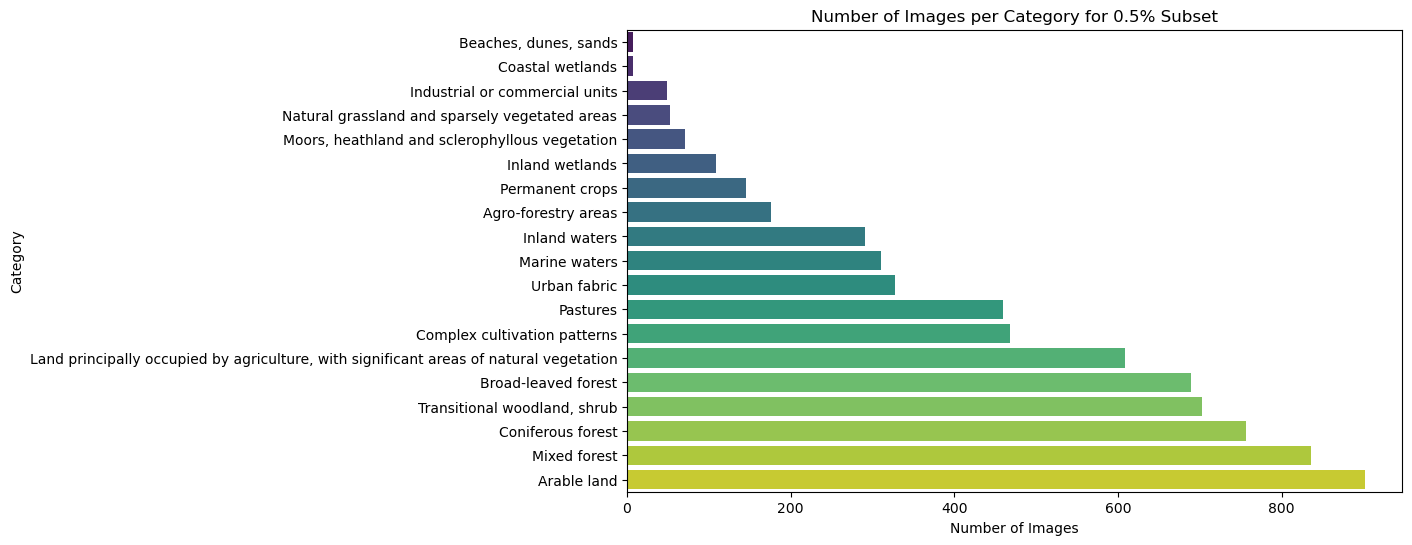

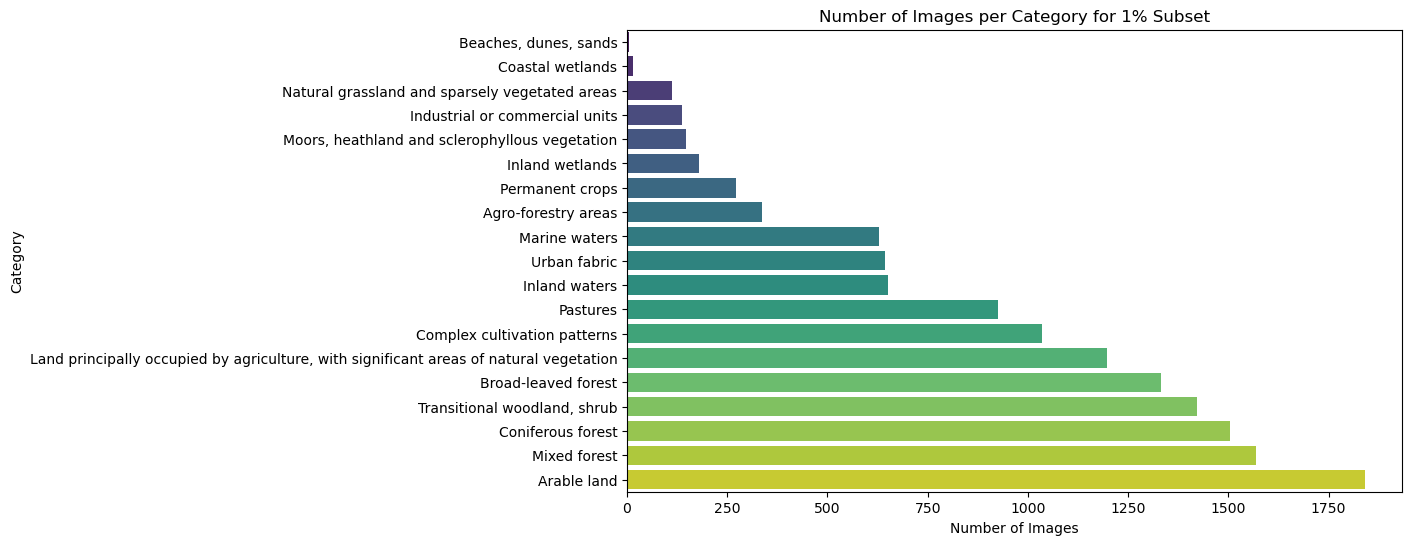

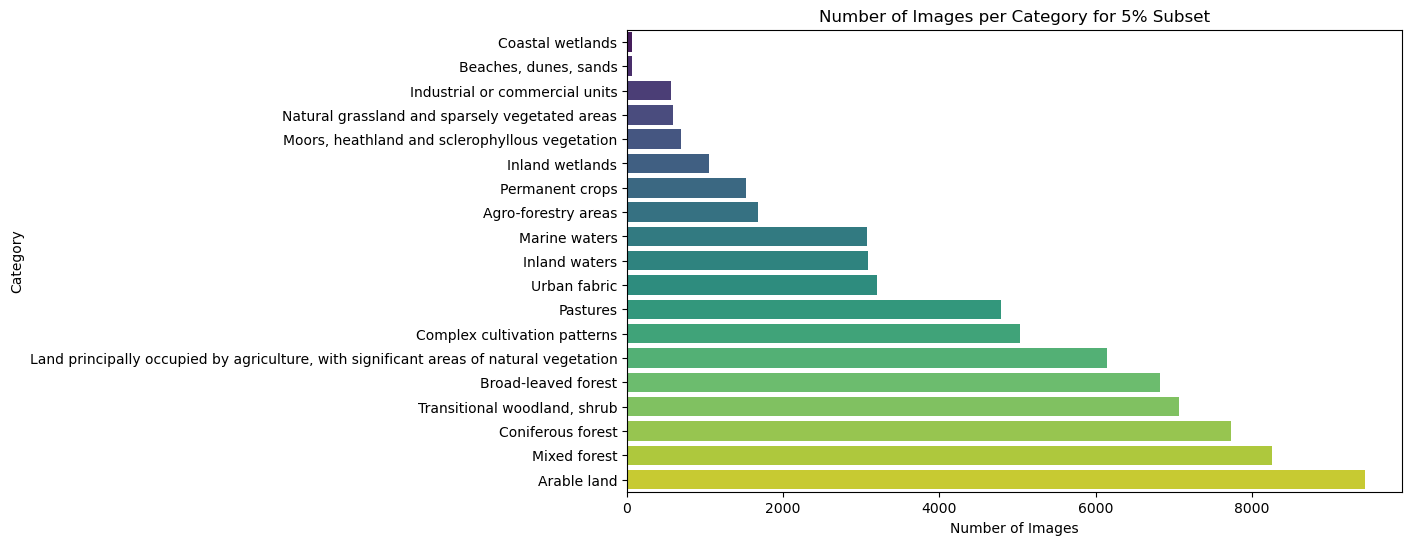

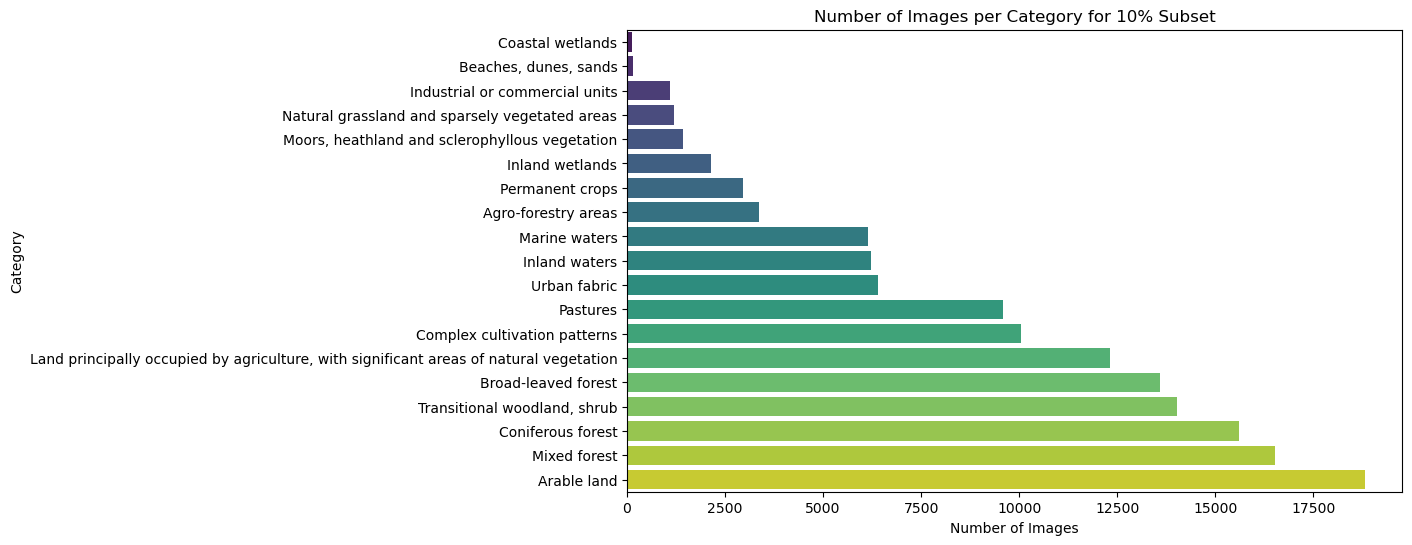

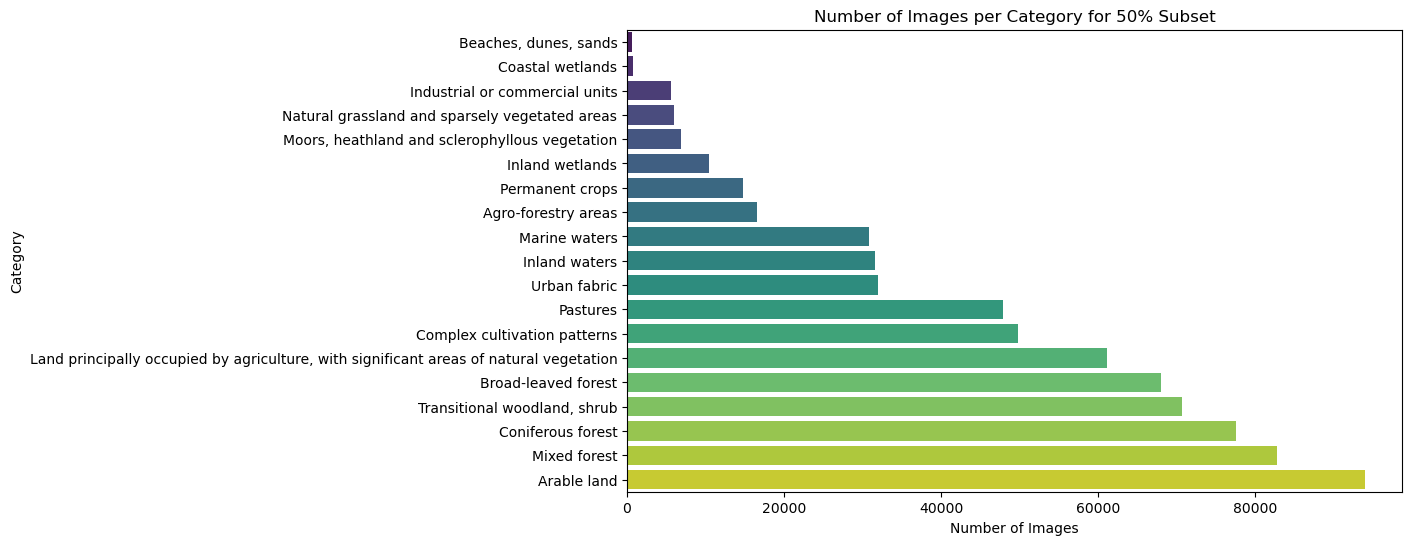

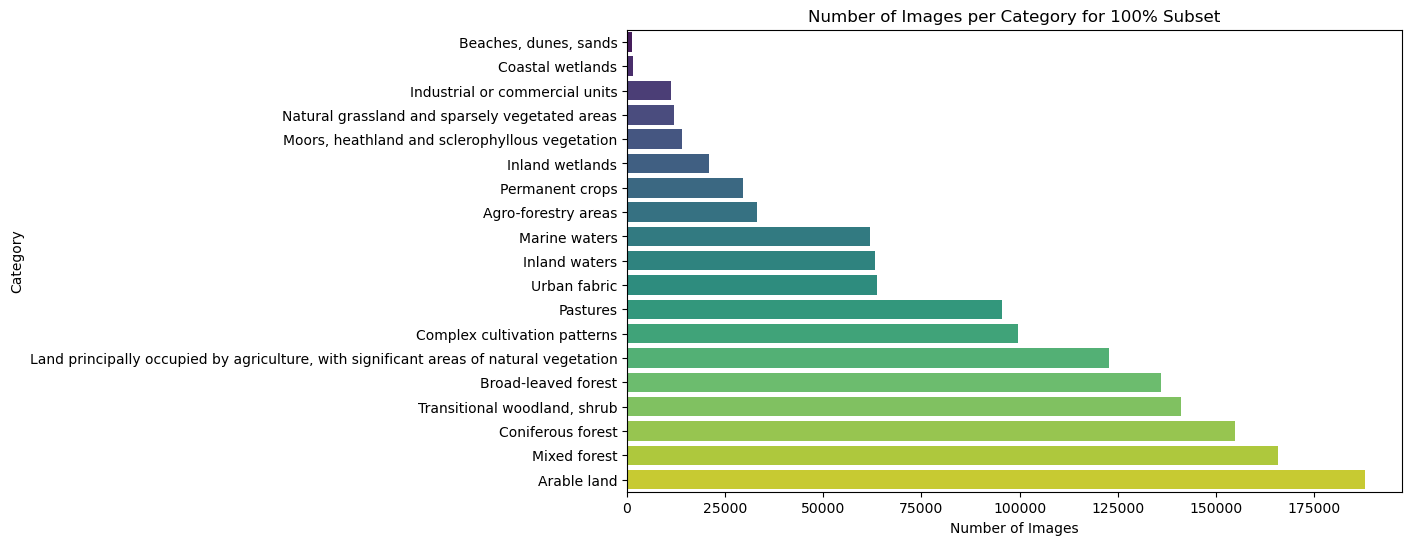

In [12]:
# Plot the data for each subset
for subset, final_df in final_dfs.items():
    # Filter out the "Total Images" row
    plot_df = final_df[final_df['Label'] != 'Total Images']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Number of Images', y='Label', data=plot_df, hue='Label', palette='viridis', dodge=False, legend=False)
    plt.title(f'Number of Images per Category for {subset} Subset')
    plt.xlabel('Number of Images')
    plt.ylabel('Category')
    plt.show()

### Generate and Map Class Labels from Metadata

In [61]:
metadata_path = r"C:\Users\isaac\Desktop\BigEarthTests\100%_BigEarthNet\metadata_100_percent.csv"

def calculate_class_labels(metadata_csv):
    metadata_csv['labels'] = metadata_csv['labels'].apply(clean_and_parse_labels) # Apply the cleaning and parsing function to the 'labels' column

    class_labels = set() # Initialize an empty set to collect unique class labels
    for labels in metadata_csv['labels']:
        class_labels.update(labels)

    class_labels = sorted(class_labels) # Convert the set to a sorted list

    return class_labels

class_labels = calculate_class_labels(pd.read_csv(metadata_path))
unique_labels = class_labels
class_labels_dict = {label: idx for idx, label in enumerate(class_labels)}
reversed_class_labels_dict = {idx: label for label, idx in class_labels_dict.items()}

print(class_labels)

['Agro-forestry areas', 'Arable land', 'Beaches, dunes, sands', 'Broad-leaved forest', 'Coastal wetlands', 'Complex cultivation patterns', 'Coniferous forest', 'Industrial or commercial units', 'Inland waters', 'Inland wetlands', 'Land principally occupied by agriculture, with significant areas of natural vegetation', 'Marine waters', 'Mixed forest', 'Moors, heathland and sclerophyllous vegetation', 'Natural grassland and sparsely vegetated areas', 'Pastures', 'Permanent crops', 'Transitional woodland, shrub', 'Urban fabric']


### Country Image Distribution Bar Plot

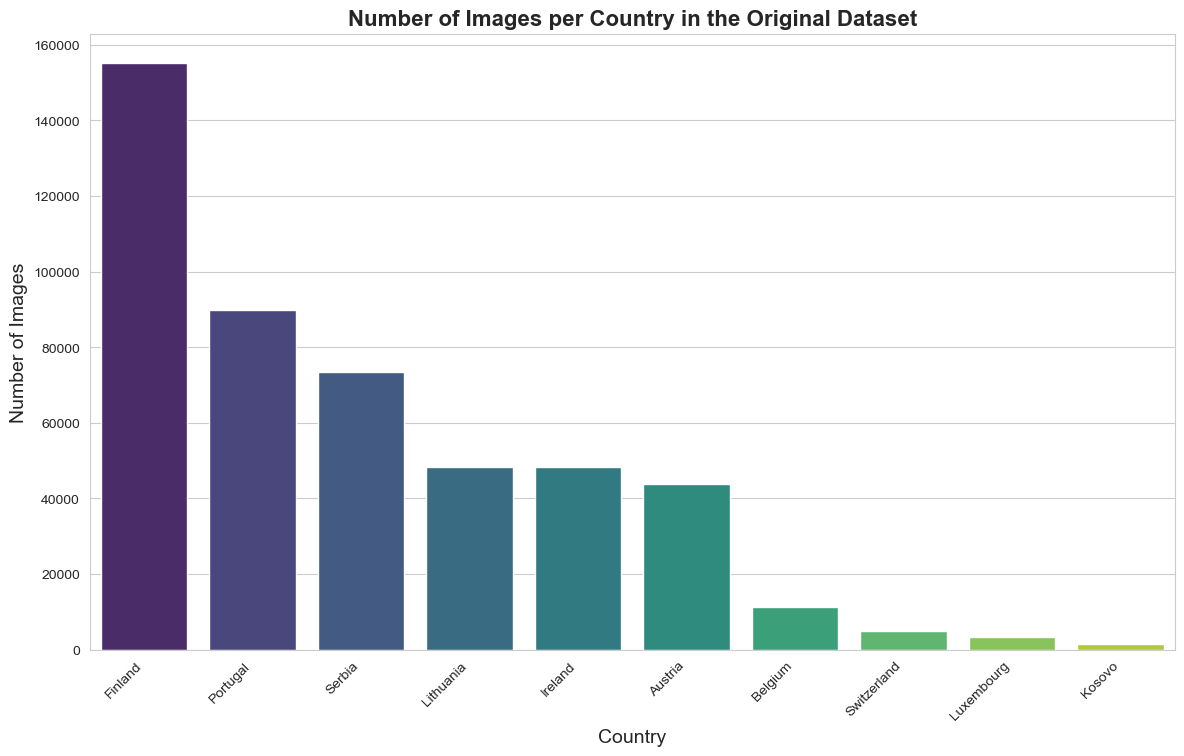

In [ ]:
def create_country_bar_plot(metadata_df, title):
    country_counts = metadata_df['country'].value_counts() # Count the number of images per country
    country_df = country_counts.reset_index()
    country_df.columns = ['Country', 'Number of Images']
    sns.set_style("whitegrid")

    plt.figure(figsize=(14, 8))  
    ax = sns.barplot(x='Country', y='Number of Images', data=country_df, hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Display the bar graph
    plt.show()

create_country_bar_plot(metadata_df_original, 'Number of Images per Country in the Original Dataset')

### Multi-Label Distribution Analysis

Label Distribution Counts:
Single Label: 86375
2 Labels: 94649
3 Labels: 135885
4 Labels: 102036
5 or More Labels: 61093
Total number of records: 480038


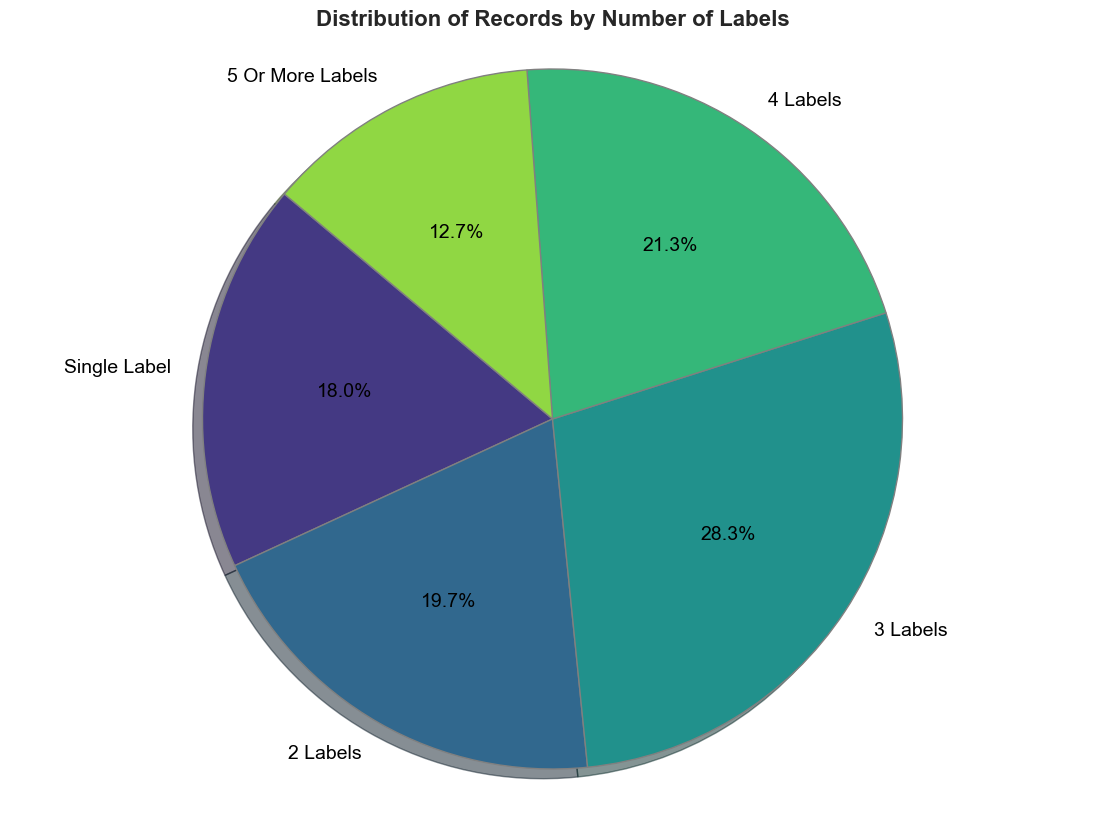

In [ ]:
def plot_label_distribution(metadata_df):
    metadata_df['labels'] = metadata_df['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
    metadata_df['label_count'] = metadata_df['labels'].apply(len)

    # Get the counts for each label count
    single_label_count = metadata_df[metadata_df['label_count'] == 1].shape[0]
    two_labels_count = metadata_df[metadata_df['label_count'] == 2].shape[0]
    three_labels_count = metadata_df[metadata_df['label_count'] == 3].shape[0]
    four_labels_count = metadata_df[metadata_df['label_count'] == 4].shape[0]
    five_labels_count = metadata_df[metadata_df['label_count'] >= 5].shape[0]

    # Calculate the total number of records
    total_records = single_label_count + two_labels_count + three_labels_count + four_labels_count + five_labels_count

    # Print the actual counts
    print("Label Distribution Counts:")
    print("Single Label:", single_label_count)
    print("2 Labels:", two_labels_count)
    print("3 Labels:", three_labels_count)
    print("4 Labels:", four_labels_count)
    print("5 or More Labels:", five_labels_count)
    print(f"Total number of records: {total_records}")

    # Plotting
    sns.set_style("whitegrid")
    sizes = [single_label_count, two_labels_count, three_labels_count, four_labels_count, five_labels_count]
    labels = ['Single Label', '2 Labels', '3 Labels', '4 Labels', '5 Or More Labels']
    colors = sns.color_palette('viridis', len(sizes))

    plt.figure(figsize=(14, 10))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
            shadow=True, textprops={'fontsize': 14, 'color': 'black'}, wedgeprops={'edgecolor': 'grey'})
    plt.title('Distribution of Records by Number of Labels', fontsize=16, weight='bold')
    plt.axis('equal')
    plt.show()

# Example usage:
metadata_df_original = pd.read_parquet(r"C:\Users\isaac\Desktop\BigEarthTests\metadata.parquet")
plot_label_distribution(metadata_df_original)


### Visualizing First Patch per Single-Label Class

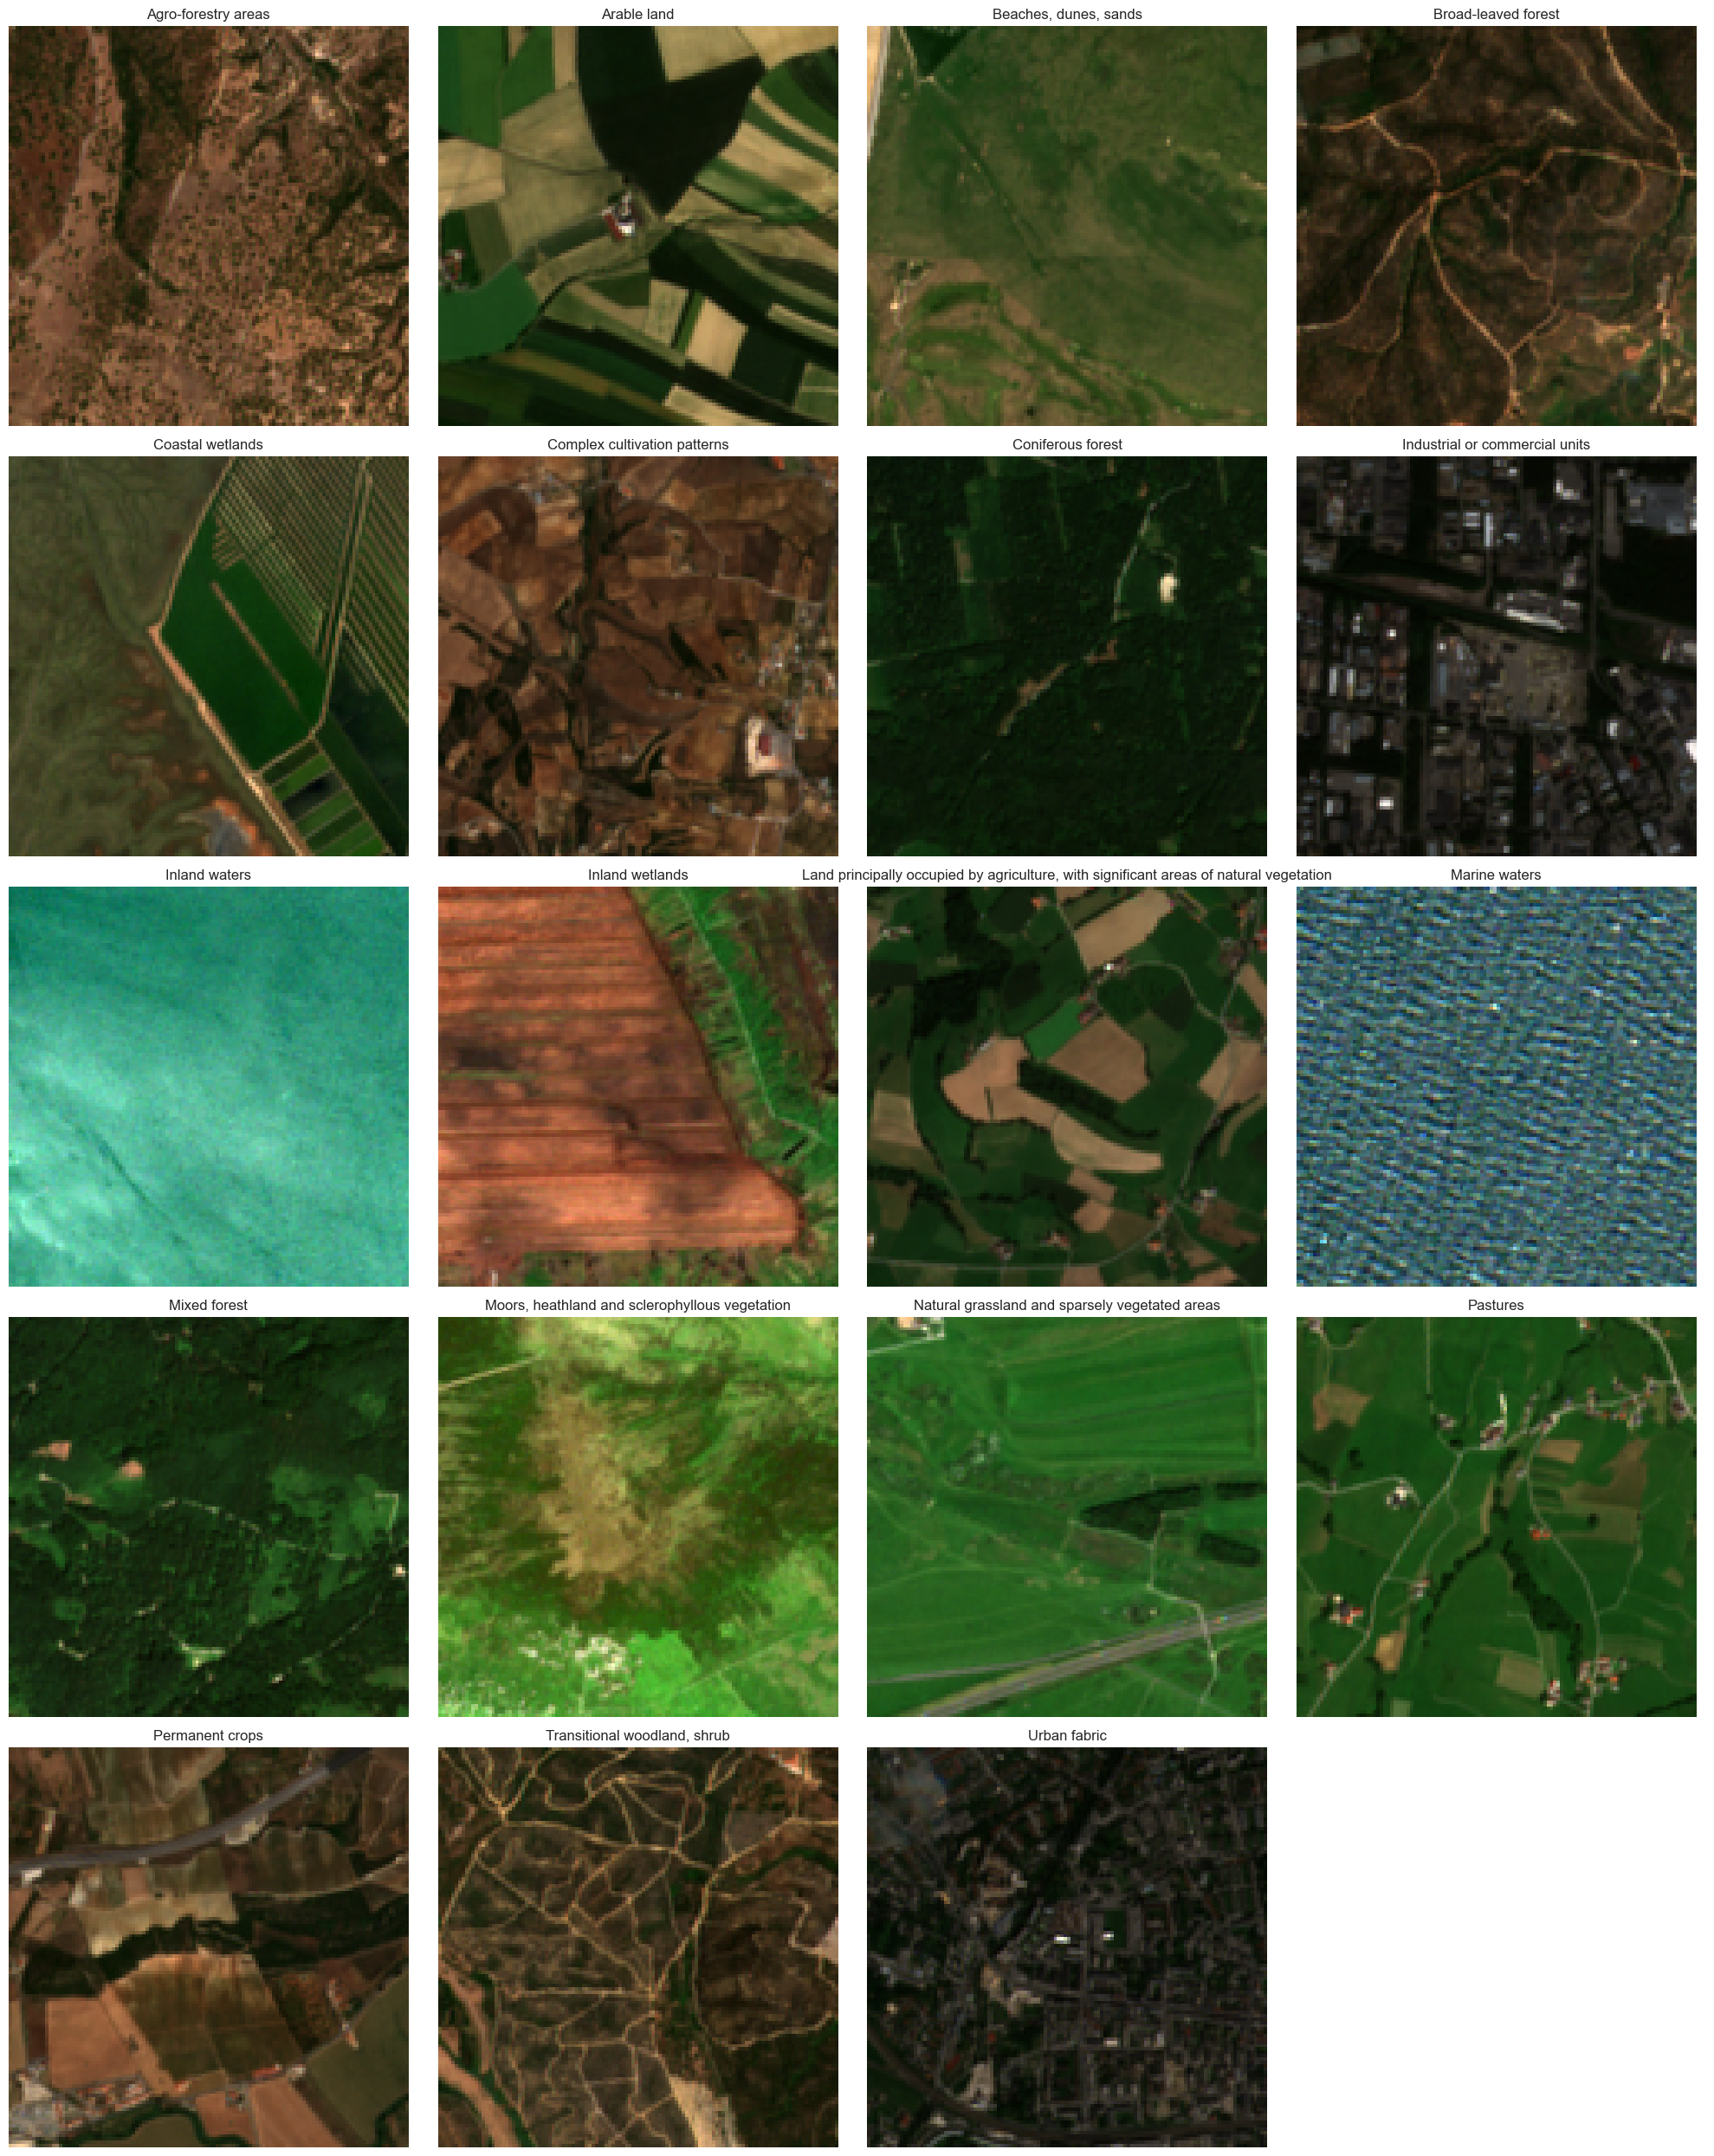

In [ ]:
original_dataset_dir = r'D:\100%_BigEarthNet'

metadata_df_original['labels'] = metadata_df_original['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
single_label_df = metadata_df_original[metadata_df_original['labels'].apply(len) == 1] # Filter the DataFrame to get rows with exactly one label

# Dictionary to store the first patch_id for each label
first_patch_ids = {}

# Iterate through each unique label and find the first patch_id with that label
for label in unique_labels:
    filtered_df = single_label_df[single_label_df['labels'].apply(lambda x: x[0] == label)]
    if not filtered_df.empty:
        first_patch_id = filtered_df.iloc[0]['patch_id']
        first_patch_ids[label] = first_patch_id

# Function to read and stack 3 specific bands from a single stacked TIFF file
def read_bands(patch_id, bands=['B04', 'B03', 'B02']):
    file_path = os.path.join(original_dataset_dir, f"{patch_id}.tif")
    band_indices = {
        'B01': 1, 'B02': 2, 'B03': 3, 'B04': 4, 'B05': 5, 'B06': 6, 'B07': 7,
        'B08': 8, 'B08A': 9, 'B09': 10, 'B11': 11, 'B12': 12
    }
    with rasterio.open(file_path) as src: # Read the selected bands from the stacked file
        stacked_bands = [src.read(band_indices[band]) for band in bands]  

    image = np.stack(stacked_bands, axis=-1) # Stack bands into a 3D array (H, W, C)
    image = (image - image.min()) / (image.max() - image.min()) # Normalize the image to the range [0, 1]

    return image

# Plotting the images in a grid
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

for i, (label, patch_id) in enumerate(first_patch_ids.items()):
    image = read_bands(patch_id)
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Visualization of Sentinel-2 Bands and Band Combinations

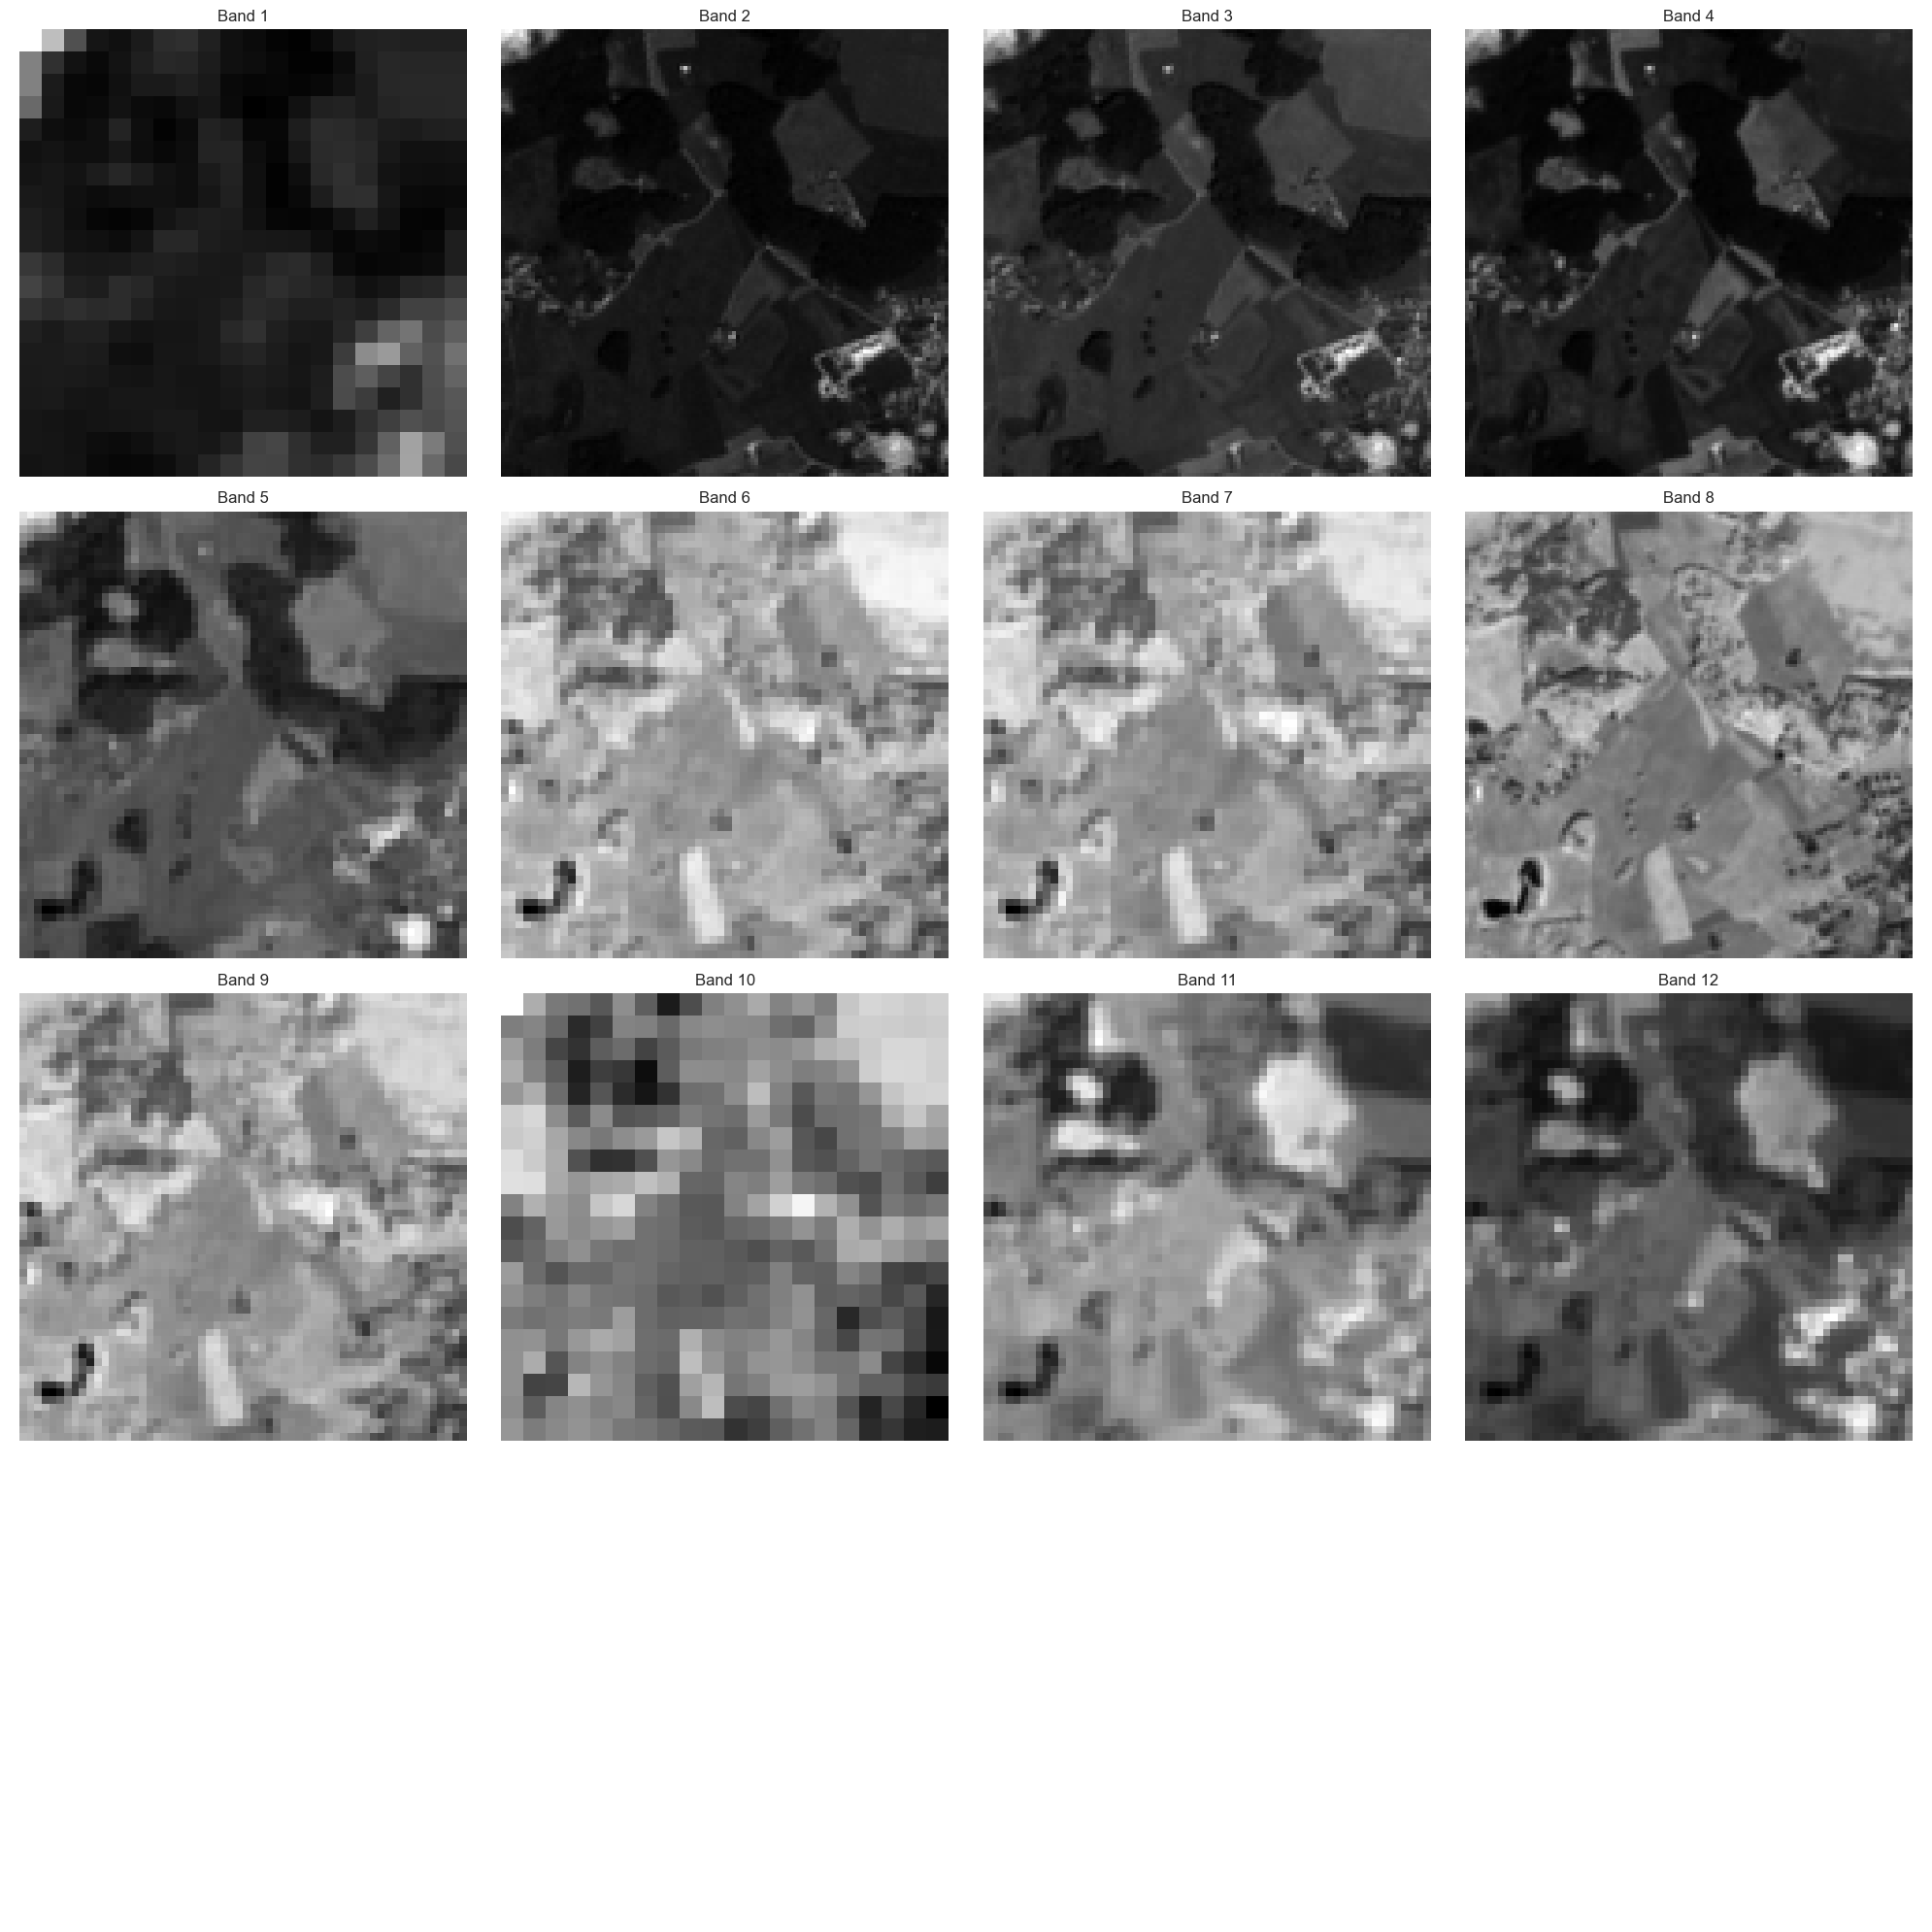

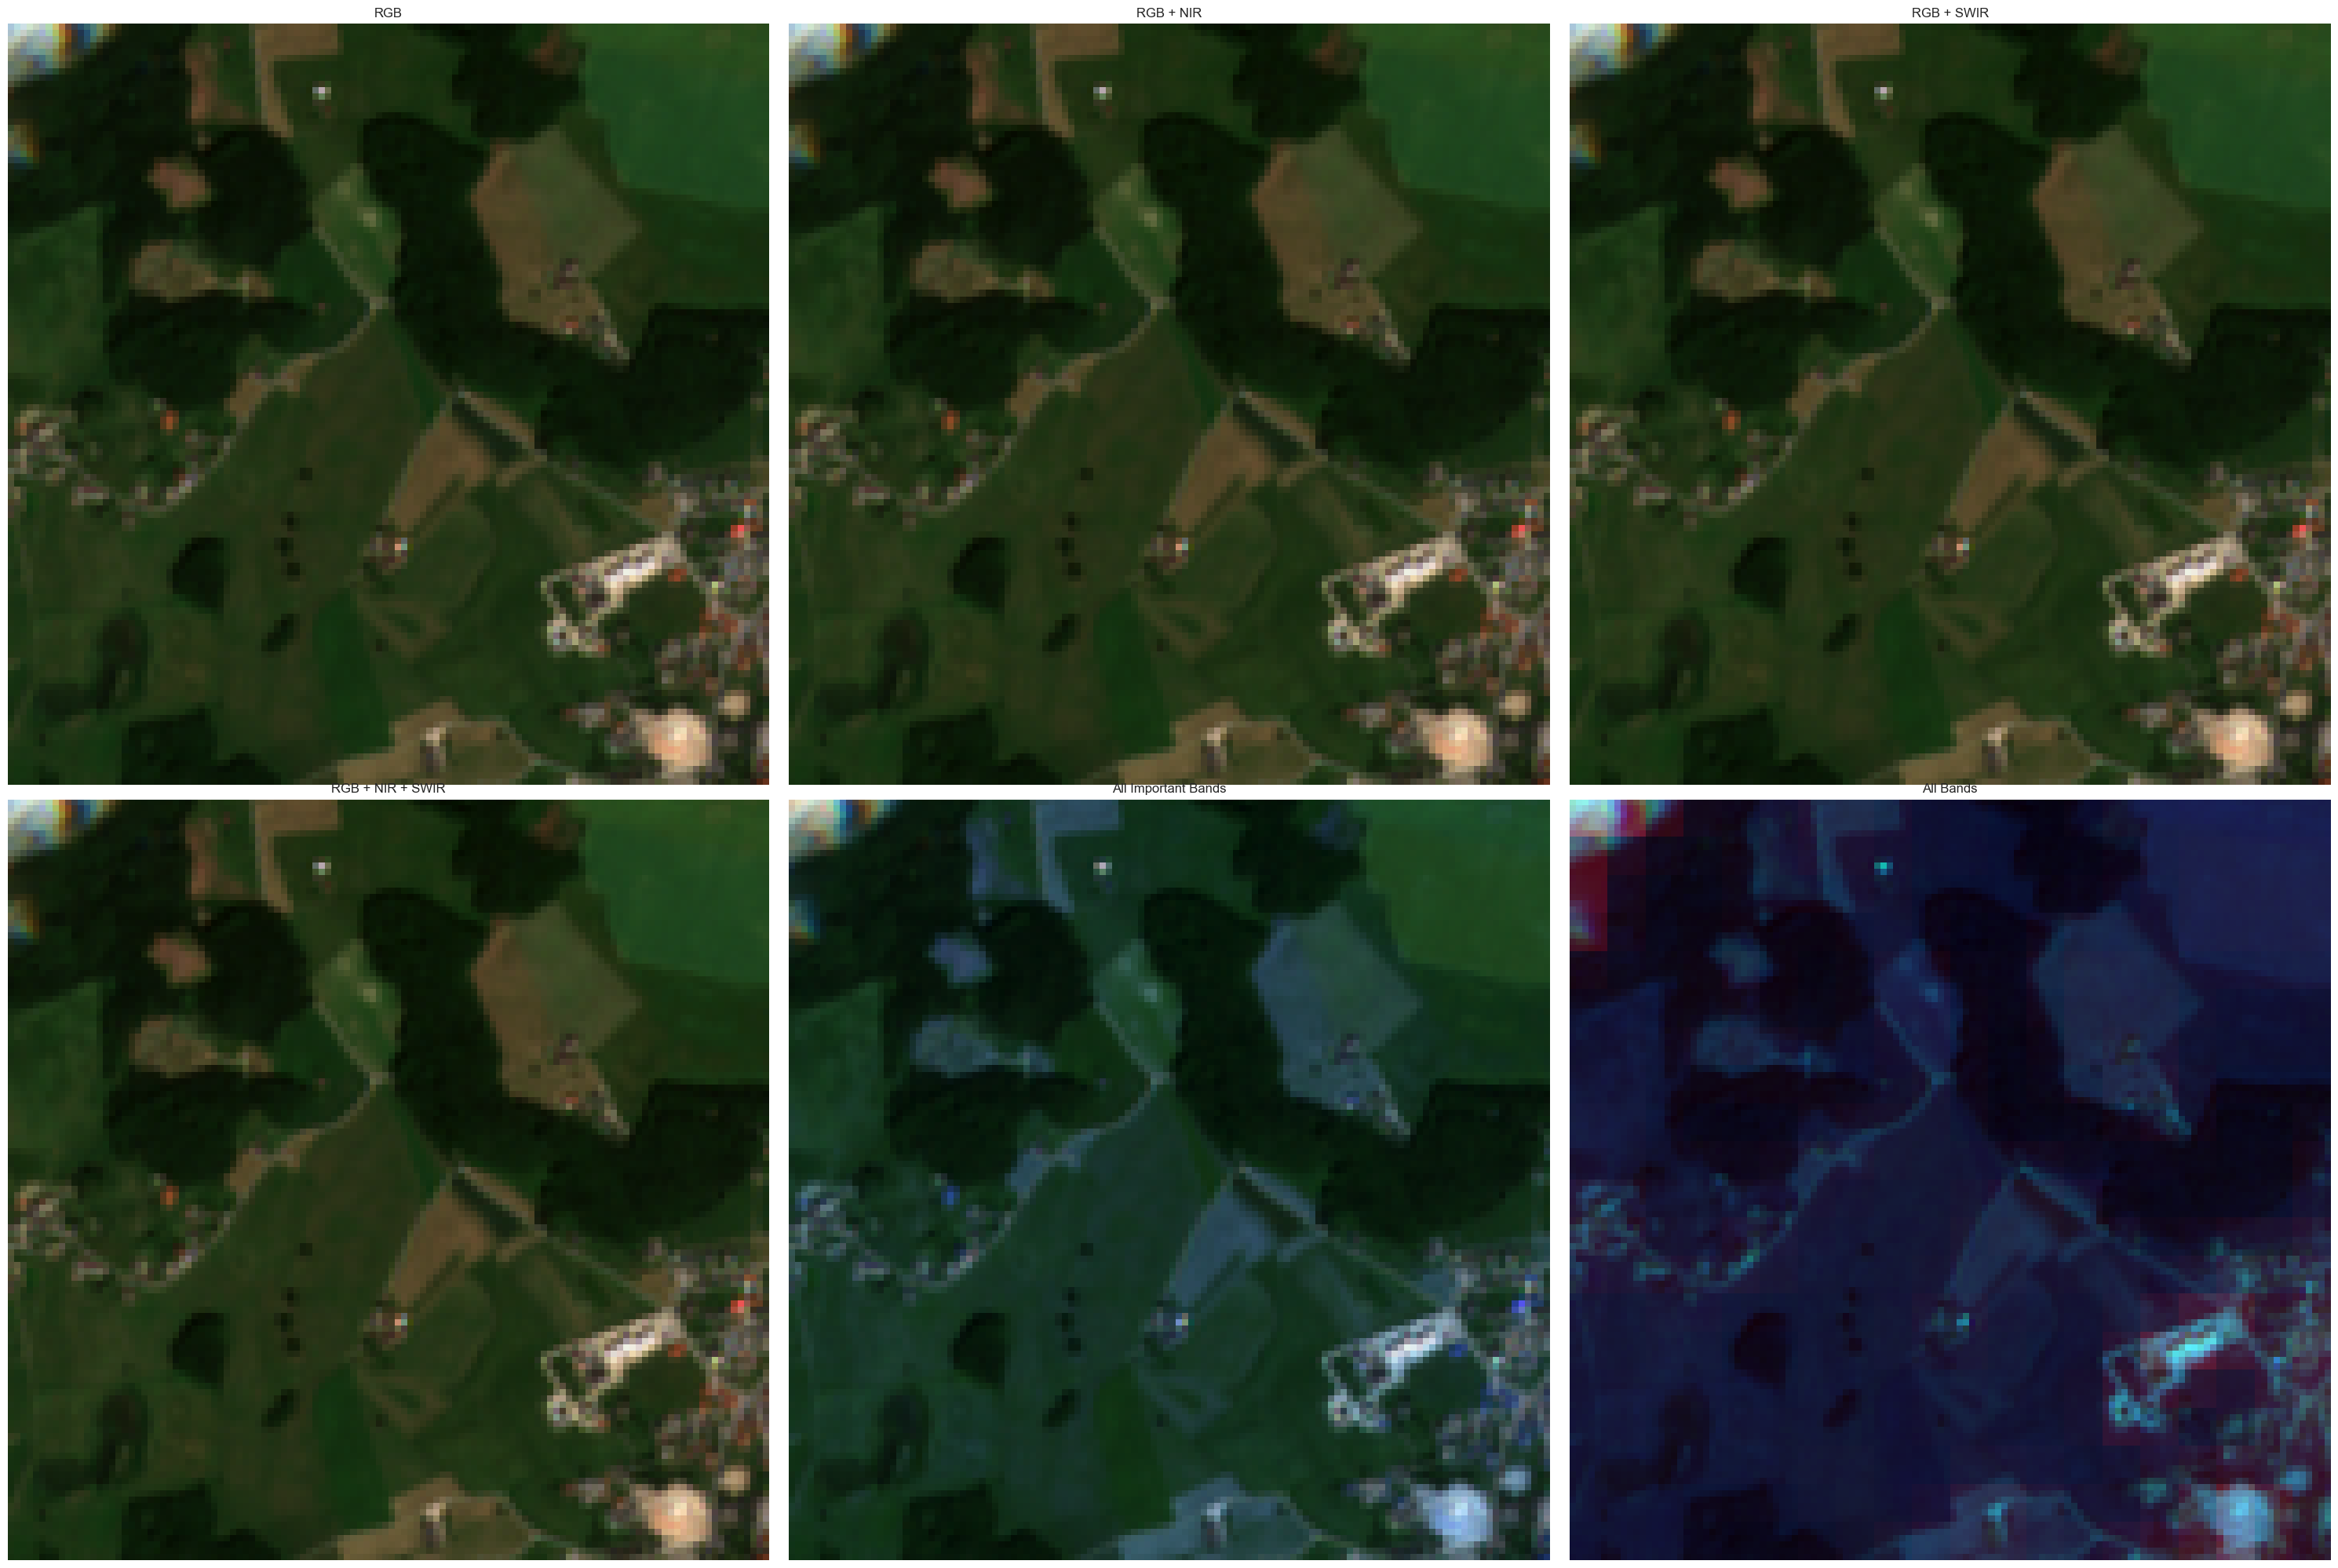

In [ ]:
# Path to the combined 13-band TIFF file
tif_path = r'C:\Users\isaac\Desktop\BigEarthTests\5%_BigEarthNet\CombinedImages\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_41_60.tif'

# Read the combined 13-band TIFF file
with rasterio.open(tif_path) as src:
    combined_image = src.read()

num_bands = combined_image.shape[0]
fig, axes = plt.subplots(4, 4, figsize=(20, 20)) # Plot the individual bands
axes = axes.flatten()

for i in range(num_bands):
    axes[i].imshow(combined_image[i], cmap='gray')
    axes[i].set_title(f'Band {i+1}')
    axes[i].axis('off')

# Hide any remaining empty subplots
for j in range(num_bands, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Function to extract and normalize bands
def extract_and_normalize_bands(image, band_indices):
    extracted_image = np.stack([image[i] for i in band_indices], axis=-1)
    normalized_image = (extracted_image - extracted_image.min()) / (extracted_image.max() - extracted_image.min())
    return normalized_image

# Band combinations
band_combinations = {
    'RGB': [3, 2, 1],  # Bands 4, 3, 2
    'RGB + NIR': [3, 2, 1, 7],  # Bands 4, 3, 2, 8
    'RGB + SWIR': [3, 2, 1, 10, 11],  # Bands 4, 3, 2, 11, 12
    'RGB + NIR + SWIR': [3, 2, 1, 7, 10, 11],  # Bands 4, 3, 2, 8, 11, 12
    'All Important Bands': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Bands 2, 3, 4, 5, 6, 7, 8, 8A, 11, 12
    'All Bands': list(range(13))  # Bands 1 to 13
}

# Plot the band combinations
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

for i, (title, band_indices) in enumerate(band_combinations.items()):
    if len(band_indices) == 3:
        image = extract_and_normalize_bands(combined_image, band_indices)
        axes[i].imshow(image)
    else:
        image = extract_and_normalize_bands(combined_image, band_indices[:3])
        axes[i].imshow(image)
    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Parsing and One-Hot Encoding Multi-Label Data

In [90]:
df = pd.read_csv(r"C:\Users\isaac\Desktop\BigEarthTests\100%_BigEarthNet\metadata_100_percent.csv")
def clean_and_parse_labels(label_string):
    if isinstance(label_string, str):
        cleaned_labels = label_string.replace(" '", ", '").replace("[", "[").replace("]", "]")
        return ast.literal_eval(cleaned_labels)
    return label_string  

df["labels"] = df["labels"].apply(clean_and_parse_labels)
all_labels = sorted(set(label for sublist in df["labels"] for label in sublist))

multi_label_matrix = pd.DataFrame(0, index=df.index, columns=all_labels) # Create a binary matrix (one-hot encoded format)

# Fill in the matrix with 1s where a label is present
for idx, row in df.iterrows():
    multi_label_matrix.loc[idx, row["labels"]] = 1  # Set corresponding label columns to 1


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [91]:
co_occurrence_matrix = np.dot(multi_label_matrix.T, multi_label_matrix) # Compute co-occurrence matrix 
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=all_labels, columns=all_labels)
print(co_occurrence_df) # Display co-occurrence matrix

                                                    Agro-forestry areas  \
Agro-forestry areas                                               33181   
Arable land                                                       19667   
Beaches, dunes, sands                                                 3   
Broad-leaved forest                                               14727   
Coastal wetlands                                                     88   
Complex cultivation patterns                                       4192   
Coniferous forest                                                  2143   
Industrial or commercial units                                      318   
Inland waters                                                      2174   
Inland wetlands                                                      14   
Land principally occupied by agriculture, with ...                 2024   
Marine waters                                                        19   
Mixed forest             

### Display Unnormalized Co_occurence matrix

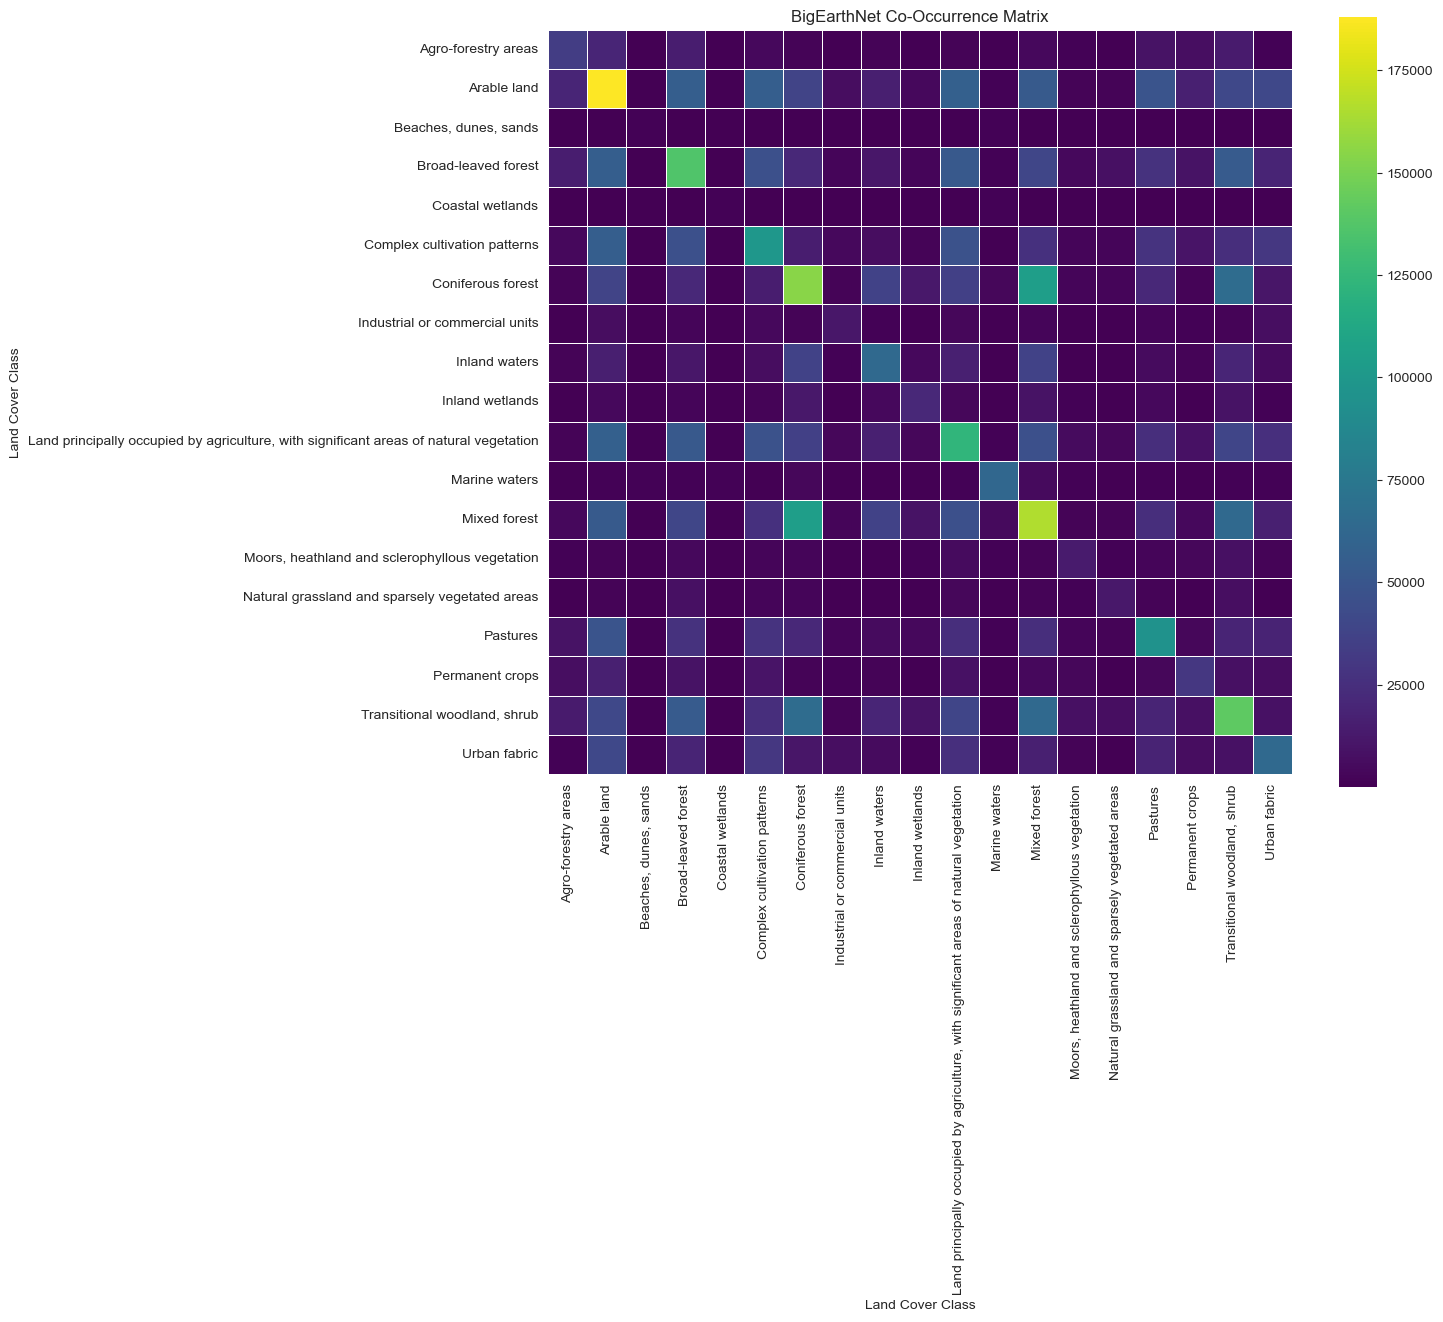

In [88]:
# Plot the co-occurrence heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, cmap="viridis", annot=False, fmt="d", square=True, linewidths=0.5)
plt.title("BigEarthNet Co-Occurrence Matrix")
plt.xlabel("Land Cover Class")
plt.ylabel("Land Cover Class")
plt.show()

### Display Normalized Co_Occurence Matrix

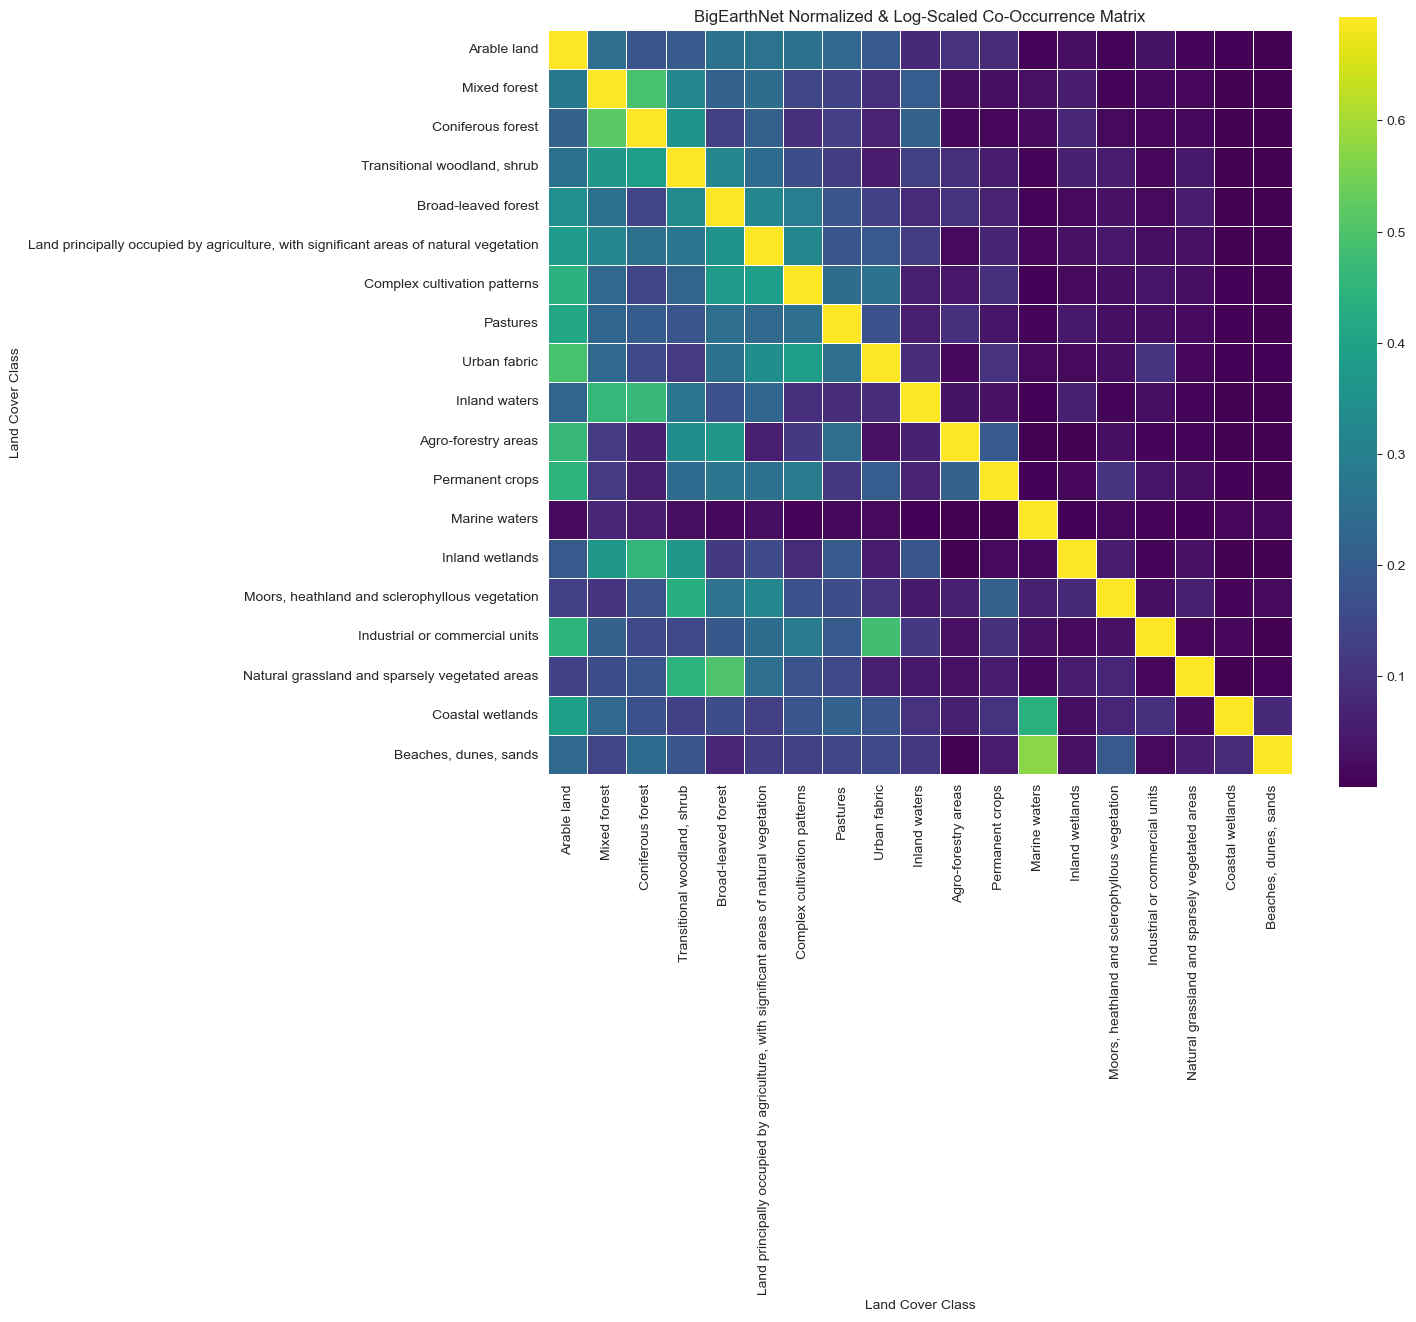

In [ ]:
co_occurrence_norm = co_occurrence_df.div(np.diag(co_occurrence_df), axis=0) # Normalize the matrix by row 
log_co_occurrence = np.log1p(co_occurrence_norm)  # Apply Log Scaling 

# Sort labels by total frequency 
sorted_labels = co_occurrence_df.sum(axis=1).sort_values(ascending=False).index
log_co_occurrence = log_co_occurrence.loc[sorted_labels, sorted_labels]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(log_co_occurrence, cmap="viridis", annot=False, fmt=".2f", square=True, linewidths=0.5)
plt.title("BigEarthNet Normalized & Log-Scaled Co-Occurrence Matrix")
plt.xlabel("Land Cover Class")
plt.ylabel("Land Cover Class")
plt.show()